In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import scipy.stats as st
import math
from datetime import datetime
import seaborn as sns

import utils

In [2]:
# load path
_2name_head = './result/third/2sessions/2024-09-30-10-32-41/'
_4name_head = './result/third/4sessions/2024-09-30-10-32-33/'
_8name_head = './result/third/8sessions/2024-09-29-11-31-09/'
_12name_head = './result/third/12sessions/2024-09-29-11-31-16/'

# save path
save_path = './result/third/' + datetime.now().strftime('%Y-%m-%d-%H-%M-%S') + '/'
utils.mkdir(save_path)

# Data loading
### 2 session data

In [3]:
# cnn_1 data
_2Acc_testdb = 100 * np.load(_2name_head + 'Acc_testdb_1.npy')
_2Acc_test_ = 100 * np.load(_2name_head + 'Acc_test_1.npy')
_2Acc_testpre = 100 * np.load(_2name_head + 'Acc_testpre_1.npy')
# cnn_2 data
_2Acc_testdb_2 = 100 * np.load(_2name_head + 'Acc_testdb_2.npy')
_2Acc_test__2 = 100 * np.load(_2name_head + 'Acc_test_2.npy')
_2Acc_testpre_2 = 100 * np.load(_2name_head + 'Acc_testpre_2.npy')

### 4 session data

In [4]:
# cnn_1 data
_4Acc_testdb = 100 * np.load(_4name_head + 'Acc_testdb_1.npy')
_4Acc_test_ = 100 * np.load(_4name_head + 'Acc_test_1.npy')
_4Acc_testpre = 100 * np.load(_4name_head + 'Acc_testpre_1.npy')
# cnn_2 data
_4Acc_testdb_2 = 100 * np.load(_4name_head + 'Acc_testdb_2.npy')
_4Acc_test__2 = 100 * np.load(_4name_head + 'Acc_test_2.npy')
_4Acc_testpre_2 = 100 * np.load(_4name_head + 'Acc_testpre_2.npy')

### 8 session data

In [5]:
# cnn_1 data
_8Acc_testdb = 100 * np.load(_8name_head + 'Acc_testdb_1.npy')
_8Acc_test_ = 100 * np.load(_8name_head + 'Acc_test_1.npy')
_8Acc_testpre = 100 * np.load(_8name_head + 'Acc_testpre_1.npy')
# cnn_2 data
_8Acc_testdb_2 = 100 * np.load(_8name_head + 'Acc_testdb_2.npy')
_8Acc_test__2 = 100 * np.load(_8name_head + 'Acc_test_2.npy')
_8Acc_testpre_2 = 100 * np.load(_8name_head + 'Acc_testpre_2.npy')

### 12 session data

In [6]:
# cnn_1 data
_12Acc_testdb = 100 * np.load(_12name_head + 'Acc_testdb_1.npy')
_12Acc_test_ = 100 * np.load(_12name_head + 'Acc_test_1.npy')
_12Acc_testpre = 100 * np.load(_12name_head + 'Acc_testpre_1.npy')
# cnn_2 data
_12Acc_testdb_2 = 100 * np.load(_12name_head + 'Acc_testdb_2.npy')
_12Acc_test__2 = 100 * np.load(_12name_head + 'Acc_test_2.npy')
_12Acc_testpre_2 = 100 * np.load(_12name_head + 'Acc_testpre_2.npy')

# calculate data threshold

In [7]:
def getIndexes(y_predict, y_data):
    run = len(y_data)//10
    y_predict = np.tile(y_predict,run)
    n = y_data.size
    SSE=((y_data-y_predict)**2).sum()
    MSE=SSE/n
    RMSE=np.sqrt(MSE)
    u = y_data.mean()
    SST=((y_data-u)**2).sum()
    SSR=SST-SSE
    R_square=SSR/SST
    return SSE, MSE, RMSE, R_square

def func(x, miu, theta):    
    return st.norm.cdf((x-miu)/theta)

def get_threshold_permodel(data,threshold=75):
    base =0.5
    Y1 = (np.array(data)/100-base)/(1-base)
    run = len(Y1)//10
    X1_ = np.arange(0,10)
    X1 = np.tile(X1_,run)
    # set the boundary of the fitting parameters
    # the first tuple is the lower bound of the parameter, and the second tuple is the upper bound of the parameter
    bounds = ([0, 0], [30., 13.])
    (miu,theta), pcov = curve_fit(func, X1,Y1,bounds=bounds,maxfev=5000)
    data_p = func(X1_,miu,theta)*100*(1-base) + base*100
    SSE, MSE, RMSE, R_square = getIndexes(data_p, np.array(data))
    return st.norm.ppf((threshold/100-base)/(1-base))*theta+miu,R_square


### pre-train data threshold

In [8]:
# 2
_2pre_train_permodel = np.array([_2Acc_testpre[:,:,0,2,:],_2Acc_testpre_2[:,:,4,6,:],_2Acc_testpre[:,:,4,2,:],_2Acc_testpre_2[:,:,0,6,:]])
_2pre_train_threshold_permodel = [[[get_threshold_permodel( i,threshold=80)[0] for i in j[0:] ]for j in k[0:] ]for k in _2pre_train_permodel]
_2pre_train_threshold_permodel_mean=np.mean(_2pre_train_threshold_permodel,axis=1)
_2pre_train_threshold_permodel_std=np.std(_2pre_train_threshold_permodel,axis=1)

# 4
_4pre_train_permodel = np.array([_4Acc_testpre[:,:,0,2,:],_4Acc_testpre_2[:,:,4,6,:],_4Acc_testpre[:,:,4,2,:],_4Acc_testpre_2[:,:,0,6,:]])
_4pre_train_threshold_permodel = [[[get_threshold_permodel( i,threshold=80)[0] for i in j[0:] ]for j in k[0:] ]for k in _4pre_train_permodel]
_4pre_train_threshold_permodel_mean=np.mean(_4pre_train_threshold_permodel,axis=1)
_4pre_train_threshold_permodel_std=np.std(_4pre_train_threshold_permodel,axis=1)

# 8
_8pre_train_permodel = np.array([_8Acc_testpre[:,:,0,2,:],_8Acc_testpre_2[:,:,4,6,:],_8Acc_testpre[:,:,4,2,:],_8Acc_testpre_2[:,:,0,6,:]])
_8pre_train_threshold_permodel = [[[get_threshold_permodel( i,threshold=80)[0] for i in j[0:] ]for j in k[0:] ]for k in _8pre_train_permodel]
_8pre_train_threshold_permodel_mean=np.mean(_8pre_train_threshold_permodel,axis=1)
_8pre_train_threshold_permodel_std=np.std(_8pre_train_threshold_permodel,axis=1)

# 12
_12pre_train_permodel = np.array([_12Acc_testpre[:,:,0,2,:],_12Acc_testpre_2[:,:,4,6,:],_12Acc_testpre[:,:,4,2,:],_12Acc_testpre_2[:,:,0,6,:]])
_12pre_train_threshold_permodel = [[[get_threshold_permodel( i,threshold=80)[0] for i in j[0:] ]for j in k[0:] ]for k in _12pre_train_permodel]
_12pre_train_threshold_permodel_mean=np.mean(_12pre_train_threshold_permodel,axis=1)
_12pre_train_threshold_permodel_std=np.std(_12pre_train_threshold_permodel,axis=1)

/tmp/ipykernel_1759984/4070956684.py:11: RuntimeWarning: divide by zero encountered in scalar divide
  R_square=SSR/SST
/home/lyumuyang/miniconda3/envs/pytorch/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:889: RuntimeWarning: divide by zero encountered in divide
  pcov = np.dot(VT.T / s**2, VT)
/home/lyumuyang/miniconda3/envs/pytorch/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:889: RuntimeWarning: overflow encountered in divide
  pcov = np.dot(VT.T / s**2, VT)


### conventional training & double training data threshold

In [9]:
# 2
# con
_2con_train_permodel = np.array([_2Acc_test_[:,:,0,2,:],_2Acc_test__2[:,:,4,6,:],_2Acc_test_[:,:,4,2,:],_2Acc_test__2[:,:,0,6,:]])
_2con_train_permodel_threshold = [[[get_threshold_permodel( i,threshold=80)[0] for i in j[0:] ]for j in k[0:] ]for k in _2con_train_permodel]
# db
_2db_train_permodel = np.array([_2Acc_testdb[:,:,0,2,:],_2Acc_testdb_2[:,:,4,6,:],_2Acc_testdb[:,:,4,2,:],_2Acc_testdb_2[:,:,0,6,:]])
_2db_train_permodel_threshold = [[[get_threshold_permodel( i,threshold=80)[0] for i in j[0:] ]for j in k[0:] ]for k in _2db_train_permodel]

# 2
# con
_4con_train_permodel = np.array([_4Acc_test_[:,:,0,2,:],_4Acc_test__2[:,:,4,6,:],_4Acc_test_[:,:,4,2,:],_4Acc_test__2[:,:,0,6,:]])
_4con_train_permodel_threshold = [[[get_threshold_permodel( i,threshold=80)[0] for i in j[0:] ]for j in k[0:] ]for k in _4con_train_permodel]
# db
_4db_train_permodel = np.array([_4Acc_testdb[:,:,0,2,:],_4Acc_testdb_2[:,:,4,6,:],_4Acc_testdb[:,:,4,2,:],_4Acc_testdb_2[:,:,0,6,:]])
_4db_train_permodel_threshold = [[[get_threshold_permodel( i,threshold=80)[0] for i in j[0:] ]for j in k[0:] ]for k in _4db_train_permodel]

# 8
# con
_8con_train_permodel = np.array([_8Acc_test_[:,:,0,2,:],_8Acc_test__2[:,:,4,6,:],_8Acc_test_[:,:,4,2,:],_8Acc_test__2[:,:,0,6,:]])
_8con_train_permodel_threshold = [[[get_threshold_permodel( i,threshold=80)[0] for i in j[0:] ]for j in k[0:] ]for k in _8con_train_permodel]
# db
_8db_train_permodel = np.array([_8Acc_testdb[:,:,0,2,:],_8Acc_testdb_2[:,:,4,6,:],_8Acc_testdb[:,:,4,2,:],_8Acc_testdb_2[:,:,0,6,:]])
_8db_train_permodel_threshold = [[[get_threshold_permodel( i,threshold=80)[0] for i in j[0:] ]for j in k[0:] ]for k in _8db_train_permodel]

# 12
# con
_12con_train_permodel = np.array([_12Acc_test_[:,:,0,2,:],_12Acc_test__2[:,:,4,6,:],_12Acc_test_[:,:,4,2,:],_12Acc_test__2[:,:,0,6,:]])
_12con_train_permodel_threshold = [[[get_threshold_permodel( i,threshold=80)[0] for i in j[0:] ]for j in k[0:] ]for k in _12con_train_permodel]
# db
_12db_train_permodel = np.array([_12Acc_testdb[:,:,0,2,:],_12Acc_testdb_2[:,:,4,6,:],_12Acc_testdb[:,:,4,2,:],_12Acc_testdb_2[:,:,0,6,:]])
_12db_train_permodel_threshold = [[[get_threshold_permodel( i,threshold=80)[0] for i in j[0:] ]for j in k[0:] ]for k in _12db_train_permodel]

/tmp/ipykernel_1759984/4070956684.py:11: RuntimeWarning: divide by zero encountered in scalar divide
  R_square=SSR/SST


# draw the figures

In [10]:
# every 20 batches one session, the last batch of each session shows the threshold
# 2
_2conventional_permodel_training = np.array([np.array(_2con_train_permodel_threshold)[:,:,10*(i+1)-1] for i in range(2)])
_2double_permodel_training = np.array([np.array(_2db_train_permodel_threshold)[:,:,20*(i+1)-1] for i in range(10)])

# 4
_4conventional_permodel_training = np.array([np.array(_4con_train_permodel_threshold)[:,:,10*(i+1)-1] for i in range(4)])
_4double_permodel_training = np.array([np.array(_4db_train_permodel_threshold)[:,:,20*(i+1)-1] for i in range(10)])

# 8
_8conventional_permodel_training = np.array([np.array(_8con_train_permodel_threshold)[:,:,10*(i+1)-1] for i in range(8)])
_8double_permodel_training = np.array([np.array(_8db_train_permodel_threshold)[:,:,20*(i+1)-1] for i in range(10)])

# 12
_12conventional_permodel_training = np.array([np.array(_12con_train_permodel_threshold)[:,:,10*(i+1)-1] for i in range(12)])
_12double_permodel_training = np.array([np.array(_12db_train_permodel_threshold)[:,:,20*(i+1)-1] for i in range(10)])

### student t test for last point

In [11]:
t_statistic_list, p_value_list = [],[]
for i in [_2double_permodel_training,_4double_permodel_training,_8double_permodel_training,_12double_permodel_training]:
    for j in [_2double_permodel_training,_4double_permodel_training,_8double_permodel_training,_12double_permodel_training]:
        t_statistic, p_value = st.ttest_ind(i[-1,1,:], j[-1,1,:])
        t_statistic_list.append(t_statistic)
        p_value_list.append(p_value)

<Axes: title={'center': 'p_value of last point'}>

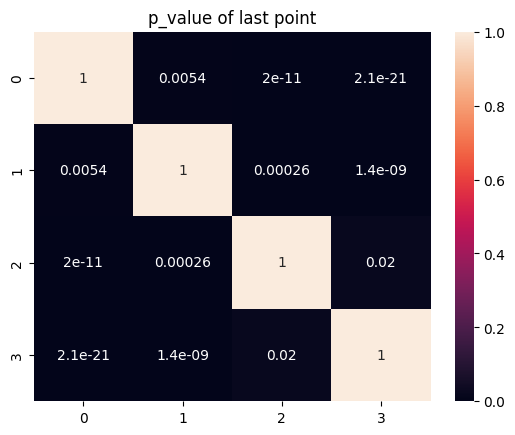

In [12]:
plt.title('p_value of last point')
sns.heatmap(np.array(p_value_list).reshape(4,4),annot=True)
# plt.savefig("./fig_update_100/exp2_heatmap_3_-3_100.pdf",dpi=300)

In [13]:
np.array(p_value_list).reshape(4,4)

array([[1.00000000e+00, 5.39642374e-03, 1.95667089e-11, 2.11087831e-21],
       [5.39642374e-03, 1.00000000e+00, 2.60919962e-04, 1.35030791e-09],
       [1.95667089e-11, 2.60919962e-04, 1.00000000e+00, 2.01100575e-02],
       [2.11087831e-21, 1.35030791e-09, 2.01100575e-02, 1.00000000e+00]])

### conventional training & double training threshold

In [14]:
# 2
_2conventional_permodel_training_mean = np.mean(_2conventional_permodel_training,axis=-1)
_2conventional_permodel_training_std = np.std(_2conventional_permodel_training,axis=-1)
_2double_permodel_training_mean = np.mean(_2double_permodel_training,axis=-1)
_2double_permodel_training_std = np.std(_2double_permodel_training,axis=-1)
# 4
_4conventional_permodel_training_mean = np.mean(_4conventional_permodel_training,axis=-1)
_4conventional_permodel_training_std = np.std(_4conventional_permodel_training,axis=-1)
_4double_permodel_training_mean = np.mean(_4double_permodel_training,axis=-1)
_4double_permodel_training_std = np.std(_4double_permodel_training,axis=-1)
# 8
_8conventional_permodel_training_mean = np.mean(_8conventional_permodel_training,axis=-1)
_8conventional_permodel_training_std = np.std(_8conventional_permodel_training,axis=-1)
_8double_permodel_training_mean = np.mean(_8double_permodel_training,axis=-1)
_8double_permodel_training_std = np.std(_8double_permodel_training,axis=-1)
# 12
_12conventional_permodel_training_mean = np.mean(_12conventional_permodel_training,axis=-1)
_12conventional_permodel_training_std = np.std(_12conventional_permodel_training,axis=-1)
_12double_permodel_training_mean = np.mean(_12double_permodel_training,axis=-1)
_12double_permodel_training_std = np.std(_12double_permodel_training,axis=-1)

In [15]:
n=len(_2pre_train_threshold_permodel[0])
n

100

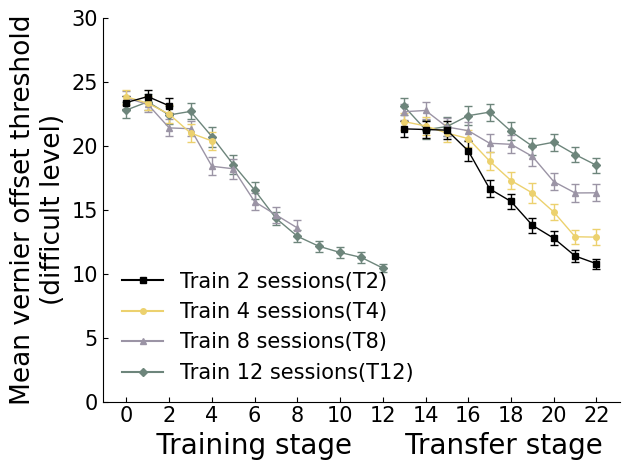

In [16]:
plt.style.use('default')

plt.figure(facecolor='white')

ax = plt.axes()
ax.set_xticks([0,2,4,6,8,10,12,14,16,18,20,22,24])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=15,direction='in')

# color
yellow=(236/255,209/255,110/255)
purple=(155/255,148/255,165/255)
green=(109/255,133/255,123/255)

# noise
# 12
plt.errorbar(np.arange(0,13,1), 
             np.concatenate(([_12pre_train_threshold_permodel_mean[0,-1]],_12conventional_permodel_training_mean[:,0])), 
             yerr=np.concatenate(([_12pre_train_threshold_permodel_std[0,-1]],_12conventional_permodel_training_std[:,0]))/math.sqrt(n), 
             marker='D', markeredgecolor=green, linestyle='-', color=green, 
             linewidth=1, markersize=4, capsize=3)
plt.errorbar(np.arange(13,23,1), _12double_permodel_training_mean[:,1], yerr=_12double_permodel_training_std[:,1]/math.sqrt(n), 
             marker='D', markeredgecolor=green, linestyle='-', color=green, 
             linewidth=1, markersize=4, capsize=3)

# 8
plt.errorbar(np.arange(0,9,1), np.concatenate(([_8pre_train_threshold_permodel_mean[0,-1]],_8conventional_permodel_training_mean[:,0])), 
             yerr=np.concatenate(([_8pre_train_threshold_permodel_std[0,-1]],_8conventional_permodel_training_std[:,0]))/math.sqrt(n), 
             marker='^', markeredgecolor=purple, linestyle='-', color=purple, 
             linewidth=1, markersize=4, capsize=3)
plt.errorbar(np.arange(13,23,1), _8double_permodel_training_mean[:,1], yerr=_8double_permodel_training_std[:,1]/math.sqrt(n), 
             marker='^', markeredgecolor=purple, linestyle='-', color=purple, 
             linewidth=1, markersize=4, capsize=3)

# 4
plt.errorbar(np.arange(0,5,1), 
             np.concatenate(([_4pre_train_threshold_permodel_mean[0,-1]],_4conventional_permodel_training_mean[:,0])), 
            yerr=np.concatenate(([_4pre_train_threshold_permodel_std[0,-1]],_4conventional_permodel_training_std[:,0]))/math.sqrt(n), 
             marker='o', markeredgecolor=yellow, linestyle='-', color=yellow, 
             linewidth=1, markersize=4, capsize=3)
plt.errorbar(np.arange(13,23,1), _4double_permodel_training_mean[:,1], yerr=_4double_permodel_training_std[:,1]/math.sqrt(n), 
             marker='o', markeredgecolor=yellow, linestyle='-', color=yellow, 
             linewidth=1, markersize=4, capsize=3)

# 2
plt.errorbar(np.arange(0,3,1), 
             np.concatenate(([_2pre_train_threshold_permodel_mean[0,-1]],_2conventional_permodel_training_mean[:,0])), 
                             yerr=np.concatenate(([_2pre_train_threshold_permodel_std[0,-1]],_2conventional_permodel_training_std[:,0]))/math.sqrt(n), 
             marker='s', markeredgecolor='black', linestyle='-', color='black', 
             linewidth=1, markersize=4, capsize=3)
plt.errorbar(np.arange(13,23,1), _2double_permodel_training_mean[:,1], yerr=_2double_permodel_training_std[:,1]/math.sqrt(n), 
             marker='s', markeredgecolor='black', linestyle='-', color='black', 
             linewidth=1, markersize=4, capsize=3)

# label
plt.plot([0], 100,  
             marker='s', markeredgecolor='black', label='Train 2 sessions(T2)', color='black', 
              markersize=4)
plt.errorbar([0], 100, 
             marker='o', markeredgecolor=yellow, label='Train 4 sessions(T4)', color=yellow, 
              markersize=4)
plt.errorbar([0], 100, 
             marker='^', markeredgecolor=purple, label='Train 8 sessions(T8)', color=purple, 
              markersize=4)
plt.errorbar([0], 100, 
             marker='D', markeredgecolor=green, label='Train 12 sessions(T12)', color=green, 
              markersize=4)


plt.xlabel('    Training stage      Transfer stage', fontsize=20)
plt.ylabel('Mean vernier offset threshold\n(difficult level)', fontsize=19)
plt.ylim(0,30)
# plt.xlim(0,23)
plt.legend(frameon=False, fontsize=15)
plt.tight_layout()

plt.savefig(save_path+'exp3_threshold_100.svg',dpi=300)

plt.show()

### double training improvement